# Testing the statistics/quality of the Wordle-Assistants #

In [1]:
#some imports
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import sys #dirty hack to deal with Python ineptitude of sibling folders
sys.path.append("..")
from WordleLib import WordleAssistant2

#!pip install line_profiler
%load_ext line_profiler

In [2]:
# load the assistant
wordleSize = 5
WA = WordleAssistant2(size=wordleSize,dictionary='MyWords.txt')
WA.initWordMeasure()
#wordset = set(['query','arose','words','cramp','alter','price','verge','color','grief','prime']) #WA.getWordset()
wordset = list(WA.getWordset())
print(len(wordset))

8258


In [3]:
#%lprun -f initWA initWA()

In [4]:
#def testrun():
# loop over all words
guesslist = [[] for i in range(30)] #number of remaining words after guess "index"
lenlist = list() #how many guesses were needed for each word

bar = tqdm(total=WA.getNumPos())
for word in wordset:
    bar.update(1)
    WA.reset()
    cnt = 0
    OptLen = WA.getNumPos()
    wordLST = list(word)
    for j in range(100):
        guesslist[cnt].append(OptLen)
        cnt +=1
        topword = WA.getTop(1)[0][0]
        QLST = [0 for i in range(wordleSize)]
        for i in range(len(topword)):
            c = topword[i]
            if c in word:
                if wordLST[i] == c:
                    QLST[i] = 2
                else:
                    QLST[i] = 1
        #print(str(cnt)+') guess='+topword+' -> '+str(QLST)+' for true word: '+word+' #words='+str(OptLen))
        if sum(QLST)==(2*wordleSize):
            lenlist.append(cnt)
            break #the guess was correct
        #If the word isn't correct yet, perform an update
        WA.update(topword,QLST)
        OptLen = WA.getNumPos()
bar.close()        

100%|██████████████████████████████████████████████████████████████████████████████| 8258/8258 [03:10<00:00, 43.26it/s]


In [5]:
#%lprun -f testrun testrun()

In [6]:
#print("Total number of guesses= "+str(lenlist))
#print("Number of words after each guess ="+str(guesslist[0:]))

print("--------------------------------------------------------")
print("* errors: 2*sigma")
print("Total number of words : "+str(len(wordset)))
print(f"The mean number of guesses is : {np.mean(lenlist):.3f} +- {2*np.std(lenlist):.3f}")
print(f"The minimum->maximum number of guesses is : {np.min(lenlist)} ({lenlist.count(np.min(lenlist))}x) -> {np.max(lenlist)} ({lenlist.count(np.max(lenlist))}x)")

--------------------------------------------------------
* errors: 2*sigma
Total number of words : 8258
The mean number of guesses is : 4.924 +- 3.135
The minimum->maximum number of guesses is : 1 (1x) -> 15 (1x)


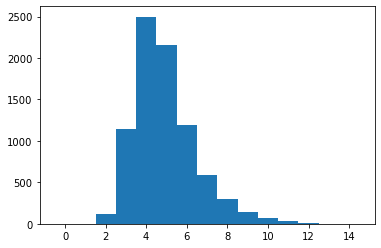

In [7]:
plt.hist(lenlist, bins = np.arange(-0.5,15.5,1.0))
plt.show()

In [8]:
for i in range(np.max(lenlist)):
    print(f"step {i+1:3}) mean #words = {np.mean(guesslist[i]):8.2f} +- {np.std(guesslist[i]):6.2f} ( #cases= {len(guesslist[i]):6} )")

step   1) mean #words =  8258.00 +-   0.00 ( #cases=   8258 )
step   2) mean #words =   332.65 +- 281.28 ( #cases=   8257 )
step   3) mean #words =    35.77 +-  42.05 ( #cases=   8142 )
step   4) mean #words =     9.69 +-  13.65 ( #cases=   7003 )
step   5) mean #words =     4.96 +-   6.25 ( #cases=   4504 )
step   6) mean #words =     3.96 +-   4.23 ( #cases=   2347 )
step   7) mean #words =     3.36 +-   2.89 ( #cases=   1153 )
step   8) mean #words =     2.96 +-   2.26 ( #cases=    559 )
step   9) mean #words =     2.54 +-   1.47 ( #cases=    254 )
step  10) mean #words =     2.17 +-   1.29 ( #cases=    116 )
step  11) mean #words =     2.05 +-   1.26 ( #cases=     44 )
step  12) mean #words =     2.07 +-   1.24 ( #cases=     15 )
step  13) mean #words =     2.20 +-   0.98 ( #cases=      5 )
step  14) mean #words =     2.00 +-   0.00 ( #cases=      2 )
step  15) mean #words =     1.00 +-   0.00 ( #cases=      1 )
